In [ ]:
#!pip install keras
#pip install tensorflow

In [ ]:
# Step 1: Importin necessary libraries

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Noramliziing pixel values
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
class_name = ['airplane', 'autombile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship', 'truck']

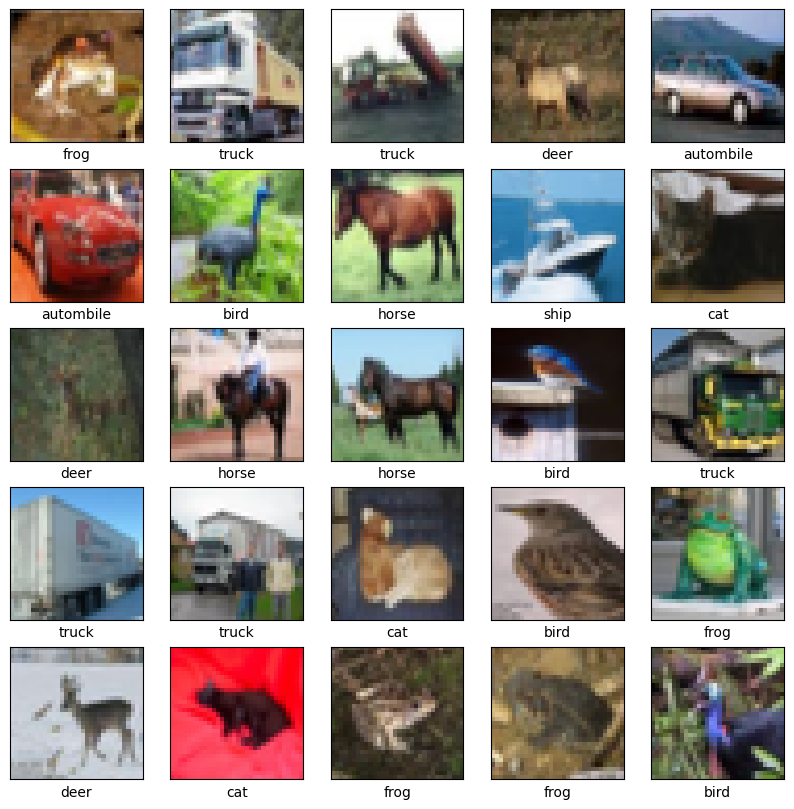

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_name[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation ='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy']
              )

In [ ]:
history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.3455 - loss: 1.7623 - val_accuracy: 0.5484 - val_loss: 1.2685
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.5723 - loss: 1.1988 - val_accuracy: 0.6350 - val_loss: 1.0482
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6398 - loss: 1.0173 - val_accuracy: 0.6455 - val_loss: 1.0213
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6873 - loss: 0.9014 - val_accuracy: 0.6676 - val_loss: 0.9511
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7079 - loss: 0.8298 - val_accuracy: 0.6935 - val_loss: 0.8737
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7305 - loss: 0.7653 - val_accuracy: 0.6719 - val_loss: 0.9331
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7501 - loss: 0.7116 - val_accuracy: 0.7006 - val_loss: 0.8665
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7667 - loss: 0.6694 

In [ ]:
test_loss , test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(f'\n Test accuracy is: {test_acc}')

313/313 - 0s - 2ms/step - accuracy: 0.7167 - loss: 0.8499

 Test accuracy is: 0.71670001745224


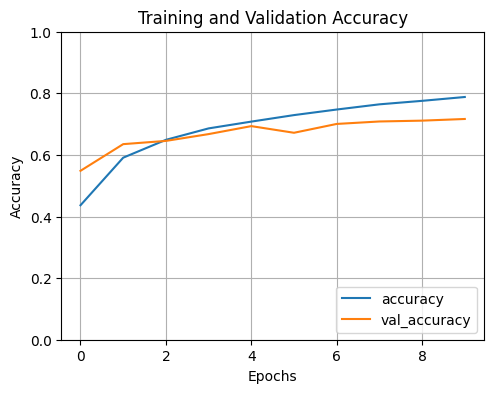

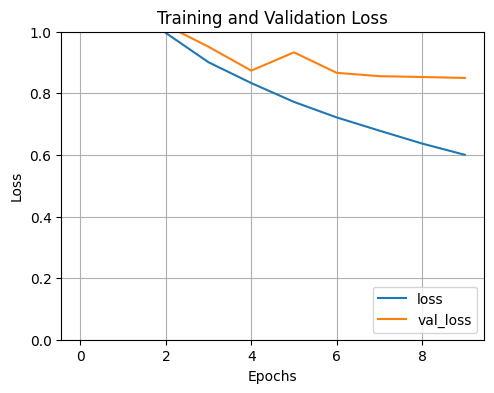

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')
plt.grid()



plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend(loc = 'lower right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

In [ ]:
# Hyperparameter Tuning

In [ ]:
#!pip install keras_tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
from keras_tuner.tuners import RandomSearch

In [ ]:
def buil_model(hp):
  model = models.Sequential()
  model.add(layers.Conv2D(hp.Int('conv1_units', min_value =32, max_value = 128, step = 16), (3,3),activation = 'relu', input_shape = (32,32,3)))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.Conv2D(hp.Int('conv2_units', min_value =32, max_value = 128, step = 16), (3,3),activation = 'relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.Conv2D(hp.Int('conv3_units', min_value =32, max_value = 128, step = 16), (3,3),activation = 'relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(hp.Int('dense_units', min_value =32, max_value = 128, step = 16), activation = 'relu'))
  model.add(layers.Dropout(hp.Float('dropout_rates', min_value =0.0, max_value = 0.5, step = 0.1)))
  model.add(layers.Dense(10))


  optimizer = tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]))

  model.compile(optimizer= optimizer,loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

  return model

In [ ]:
tuner = RandomSearch(
            buil_model,
            objective='val_accuracy',
            max_trials=10,
            executions_per_trial=10,
            directory='my_dir',
            project_name='cifar10_tunning'
)

tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]


model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_data = (test_images, test_labels))

Trial 10 Complete [00h 06m 25s]
val_accuracy: 0.5378500103950501

Best val_accuracy So Far: 0.6966800093650818
Total elapsed time: 01h 08m 30s
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3309 - loss: 1.8021 - val_accuracy: 0.5542 - val_loss: 1.2278
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5630 - loss: 1.2253 - val_accuracy: 0.6388 - val_loss: 1.0316
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6314 - loss: 1.0339 - val_accuracy: 0.6316 - val_loss: 1.0412
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6818 - loss: 0.9093 - val_accuracy: 0.6824 - val_loss: 0.9180
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7099 - loss: 0.8185 - val_accuracy: 0.7017 - val_loss: 0.8581
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7347 - loss: 0.7556 - val_accuracy: 0.7087 - val_loss: 0.8476
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7574 -

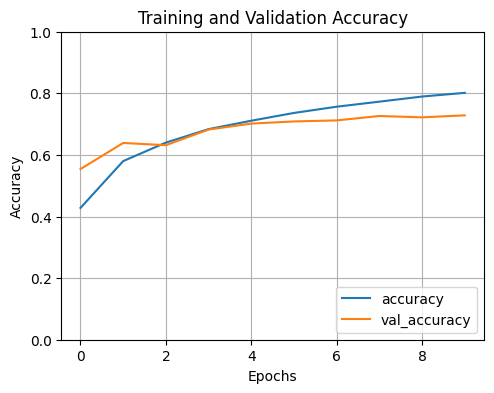

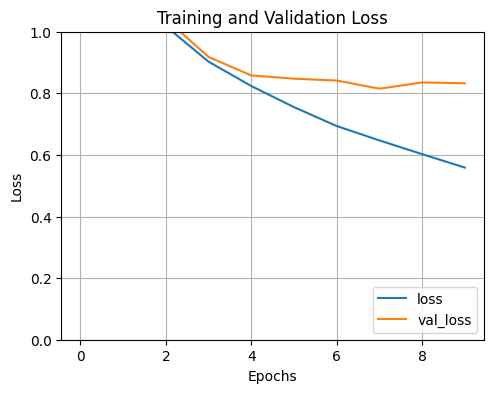

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')
plt.grid()



plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend(loc = 'lower right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()

In [ ]:
# Advance Hyperparameter Tuning

In [ ]:
def buil_model(hp):
  model = model.Sequential()

  for i in range(hp.Int('conv_layers', 1,3)):
    if i == 0:
      model.add(layers.Conv2D(
          filters = hp.Int('filters_' + str(i), min_value =32, max_value=128, step=16),
          kernel_size = (3,3),
          activation = 'relu',
          input_shape=(32,32,3)
      ))
    else:
      model.add(layers.Conv2D(
          filters = hp.Int('filters_'+str(i),min_value=32, max_value=128, step=16),
          kernel_size=(3,3),
          activation ='relu',
          padding = 'same'
      ))
      model.add(layers.MaxPooling2D(pool_size=(2,2)))

    model.add(layers.Flatten())

    for i in range(hp.Int('dense_layers', 1,3)):
        model.add(layers.Dense(
            units = hp.Int('units_' + str(i), min_value=32, max_value=128, step=16),
            activation='relu'
        ))

        model.add(layers.Dropout(rate=hp.Float('dropout_'+str(i), min_value=0.0,max_value=0.5,step=0.1)))
    model.add(layers.Dense(10, activation='softmax'))


    optimizer = tf.keras.optimizers.Adam(learning_rate=hp.choice('learning_rate', value=[1e-2,1e-3,1e-4]))
    model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
    return model





In [ ]:
tuner = RandomSearch(
            buil_model,
            objective='val_accuracy',
            max_trials=10,
            executions_per_trial=1,
            directory='my_dir',
            project_name='cifar10_tunning'
)

tuner.search(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]


model = tuner.hypermodel.build(best_hps)
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Reloading Tuner from my_dir/cifar10_tunning/tuner0.json


UnboundLocalError: local variable 'model' referenced before assignment

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy')
plt.grid()



plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,1])
plt.legend(loc = 'lower right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()